<a href="https://colab.research.google.com/github/jenny005/Reinforcement-Learning-by-Sutton-Barto/blob/main/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 : Dynamic Programming

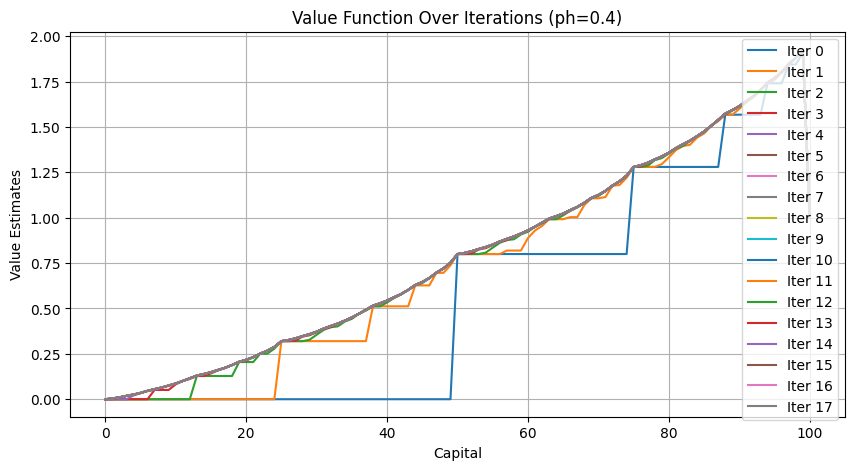

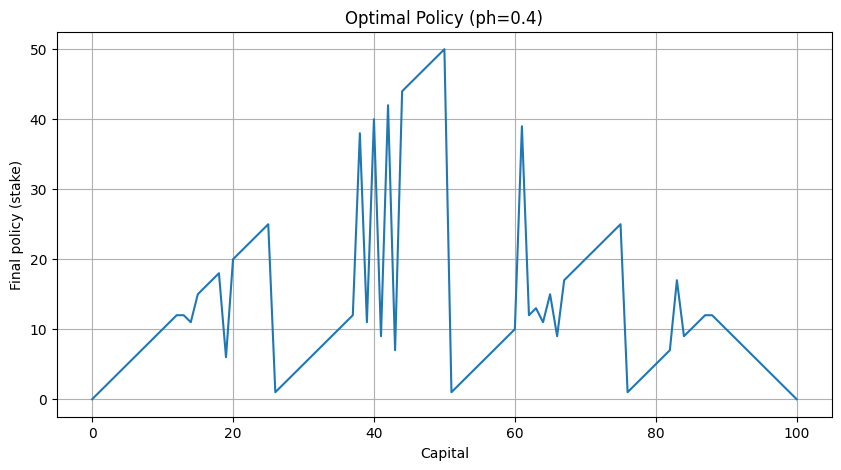

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gambler's Problem parameters
goal = 100
ph = 0.4  # probability of heads
gamma = 1.0

# Initialize state values and policy
V = np.zeros(goal + 1)
V[goal] = 1.0  # Value of goal state is 1
policy = np.zeros(goal + 1)

# Value Iteration parameters
theta = 1e-9

# Store history of value functions
V_history = []

iteration = 0
while True:
    delta = 0
    V_old = V.copy()
    for s in range(1, goal):
        action_returns = []
        actions = range(1, min(s, goal - s) + 1)
        for a in actions:
            win_state = s + a
            lose_state = s - a
            reward = 1 if win_state == goal else 0
            expected_return = ph * (reward + gamma * V[win_state]) + (1 - ph) * gamma * V[lose_state]
            action_returns.append(expected_return)
        best_action_value = max(action_returns)
        delta = max(delta, abs(best_action_value - V[s]))
        V[s] = best_action_value
    iteration += 1
    V_history.append(V.copy())
    if delta < theta:
        break

# Derive optimal policy
for s in range(1, goal):
    actions = range(1, min(s, goal - s) + 1)
    action_returns = []
    for a in actions:
        win_state = s + a
        lose_state = s - a
        reward = 1 if win_state == goal else 0
        expected_return = ph * (reward + gamma * V[win_state]) + (1 - ph) * gamma * V[lose_state]
        action_returns.append(expected_return)
    best_action = actions[np.argmax(action_returns)]
    policy[s] = best_action

# Plot value function evolution
plt.figure(figsize=(10, 5))
for i in range(0, len(V_history), max(1, len(V_history)//10)):
    plt.plot(V_history[i], label=f'Iter {i}')
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title(f'Value Function Over Iterations (ph={ph})')
plt.legend()
plt.grid(True)
plt.show()

# Plot policy
plt.figure(figsize=(10, 5))
plt.plot(policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title(f'Optimal Policy (ph={ph})')
plt.grid(True)
plt.show()


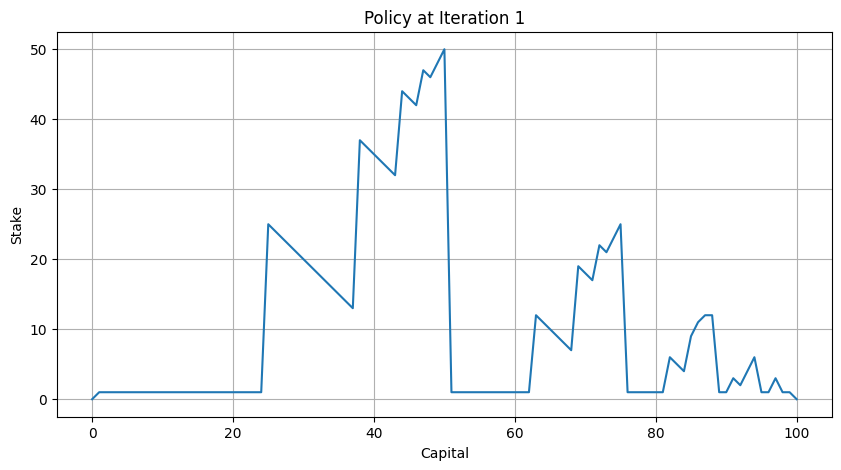

Press Enter to show next iteration...


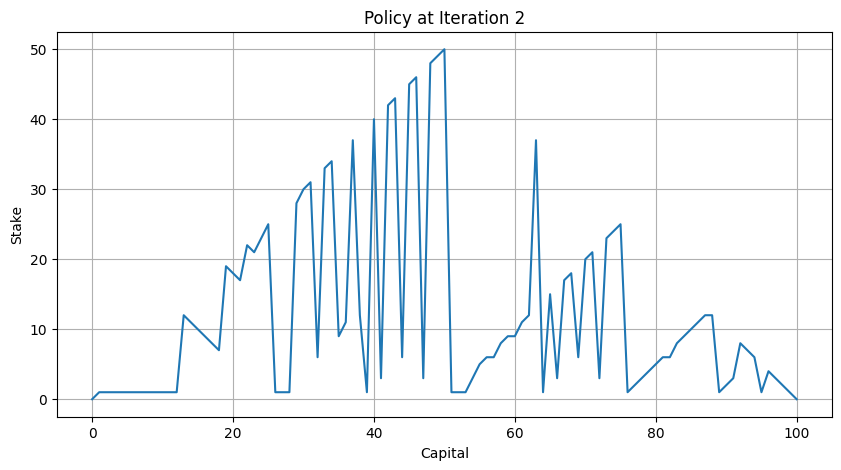

Press Enter to show next iteration...


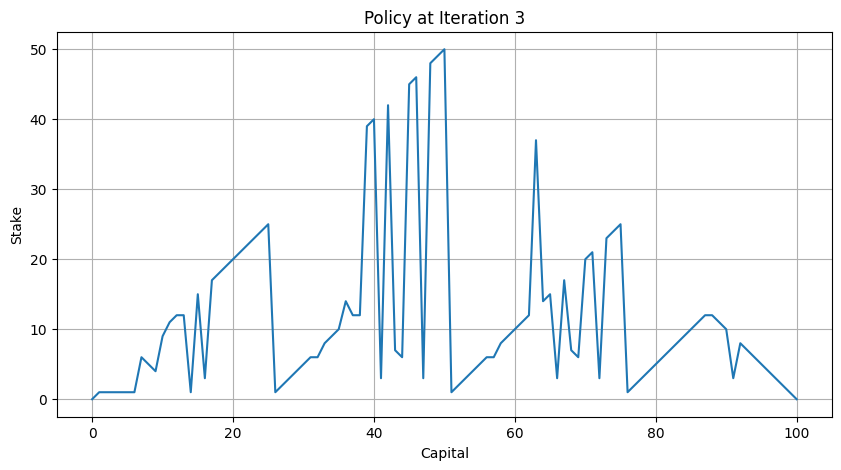

Press Enter to show next iteration...


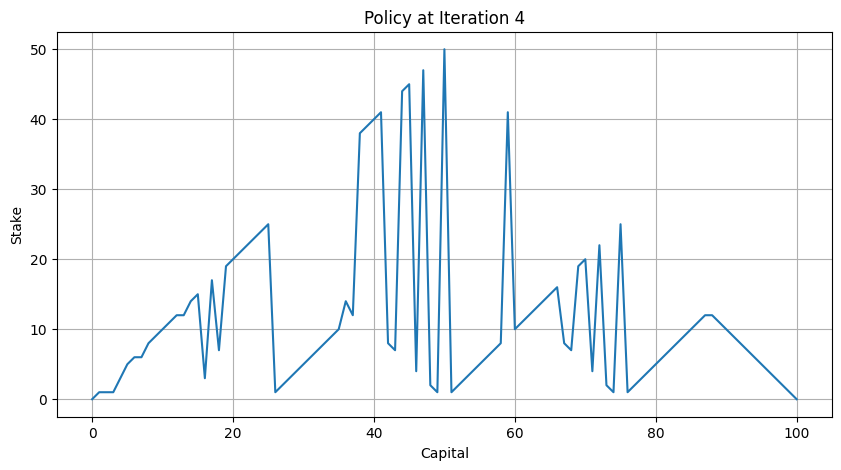

Press Enter to show next iteration...


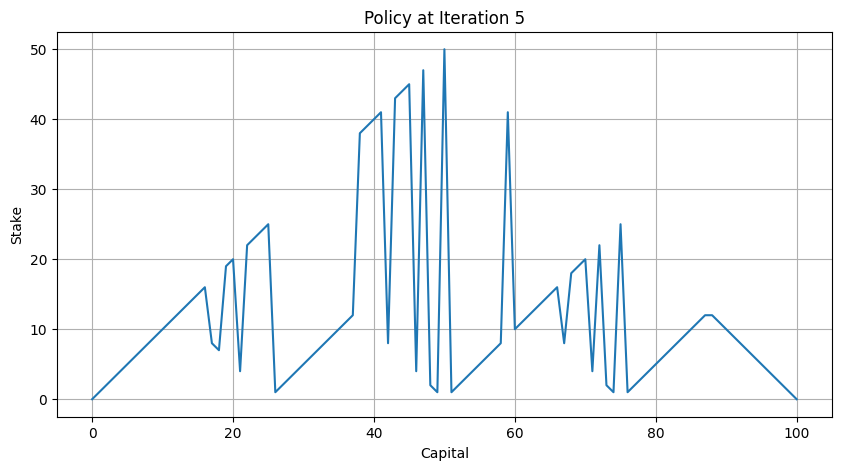

Press Enter to show next iteration...


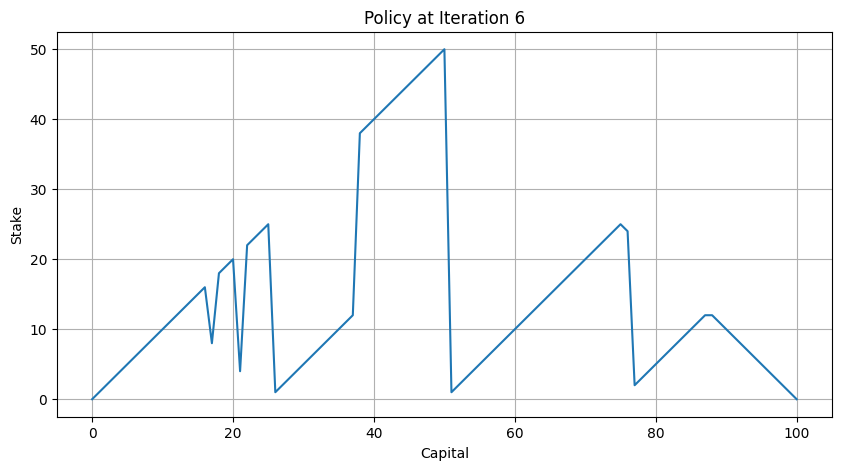

Press Enter to show next iteration...


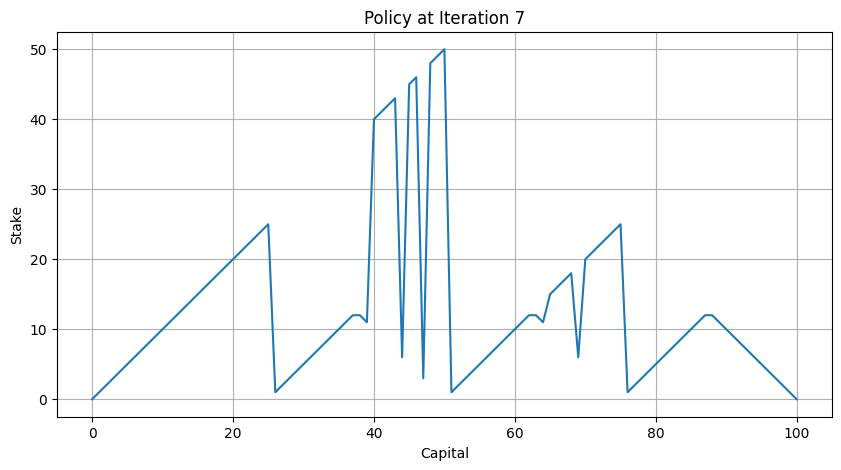

Press Enter to show next iteration...


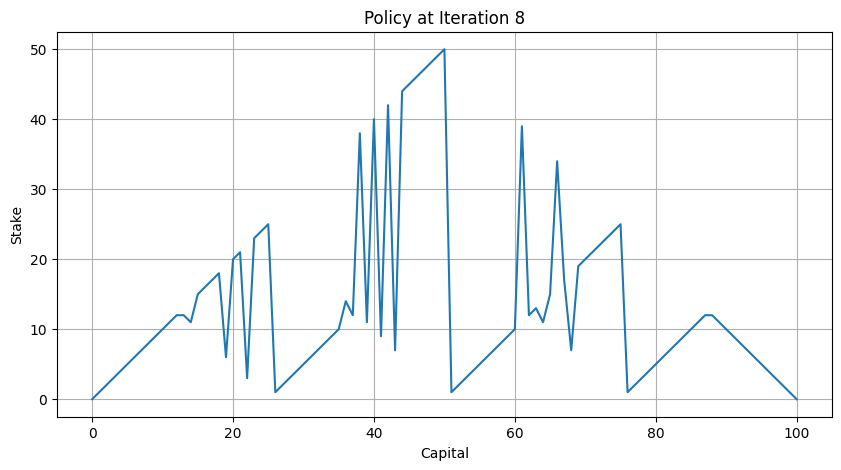

Press Enter to show next iteration...


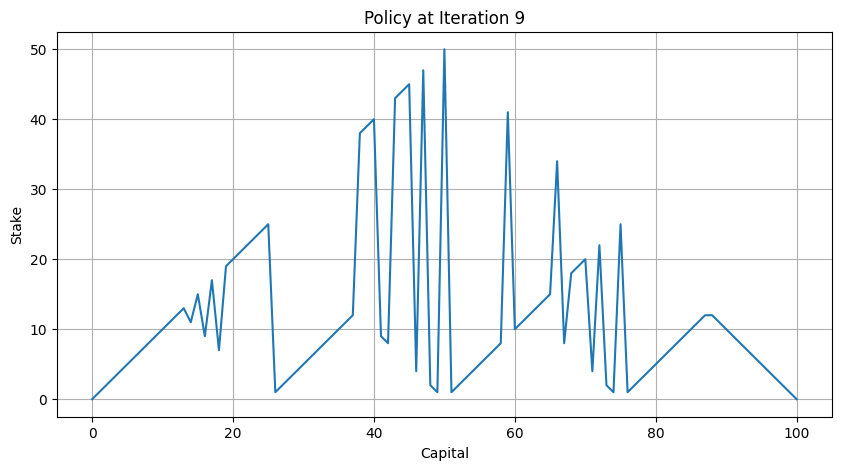

Press Enter to show next iteration...


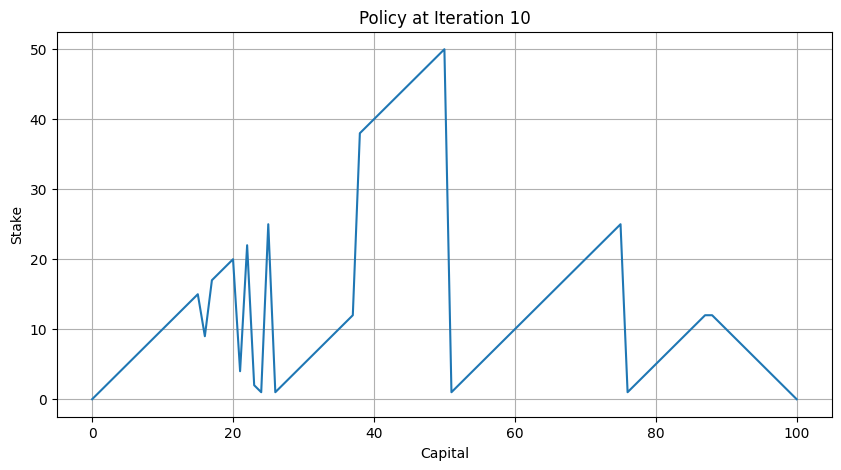

Press Enter to show next iteration...


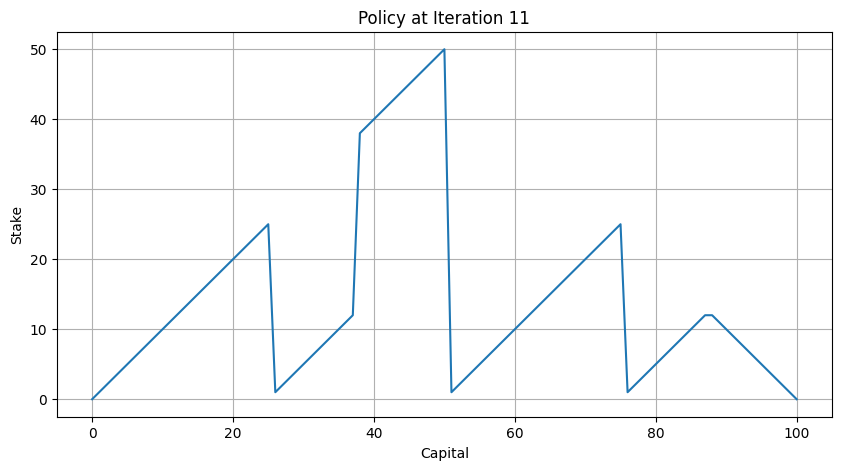

Press Enter to show next iteration...


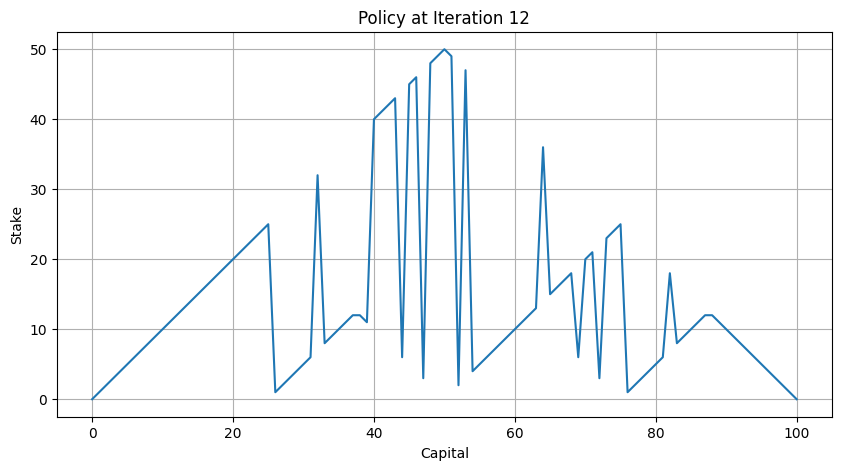

Press Enter to show next iteration...


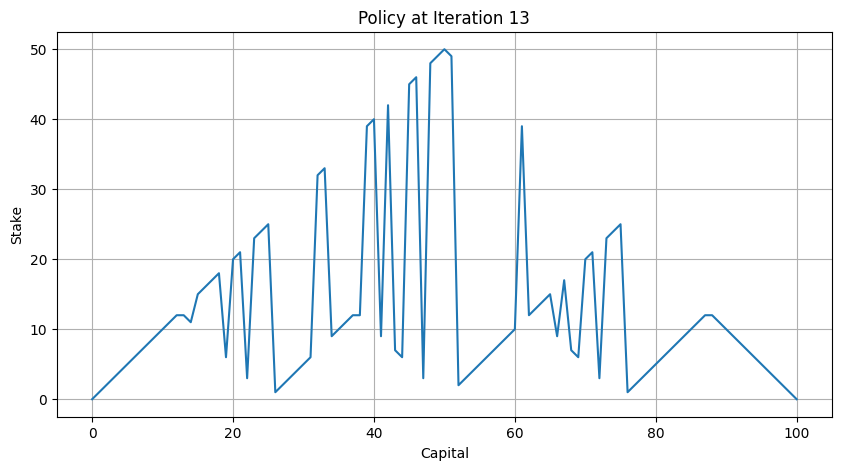

Press Enter to show next iteration...


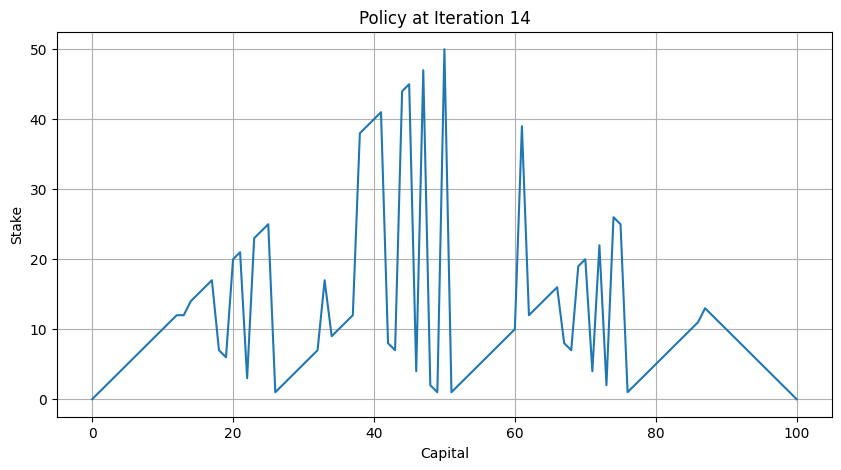

Press Enter to show next iteration...


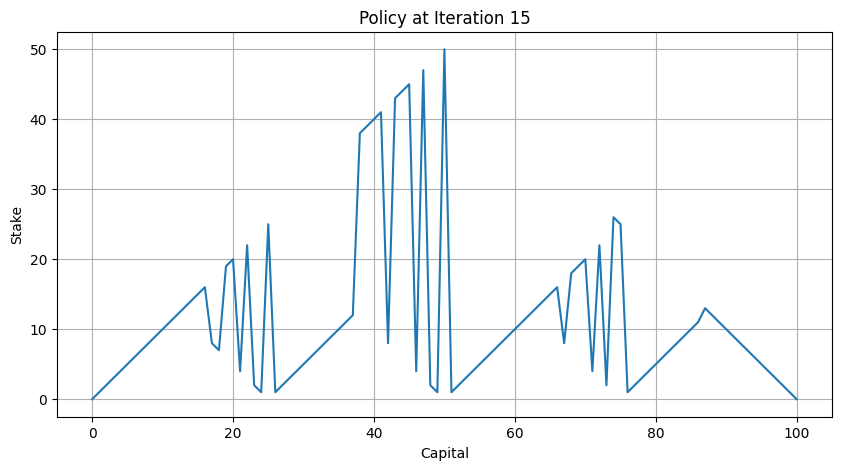

Press Enter to show next iteration...


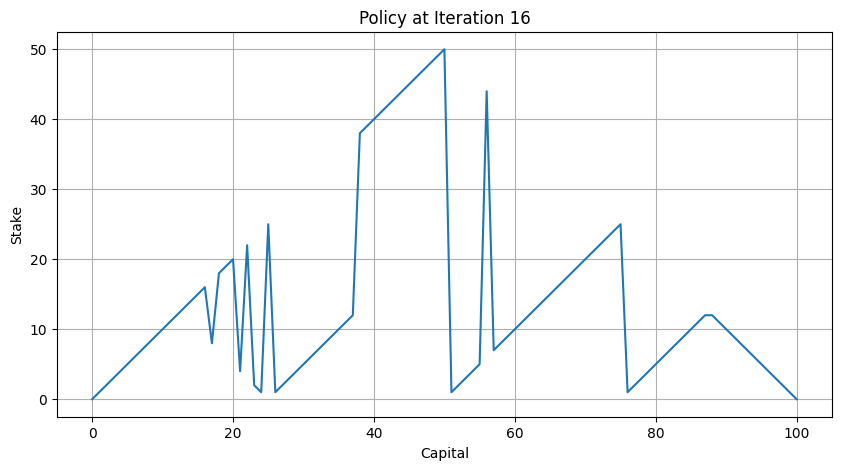

Press Enter to show next iteration...


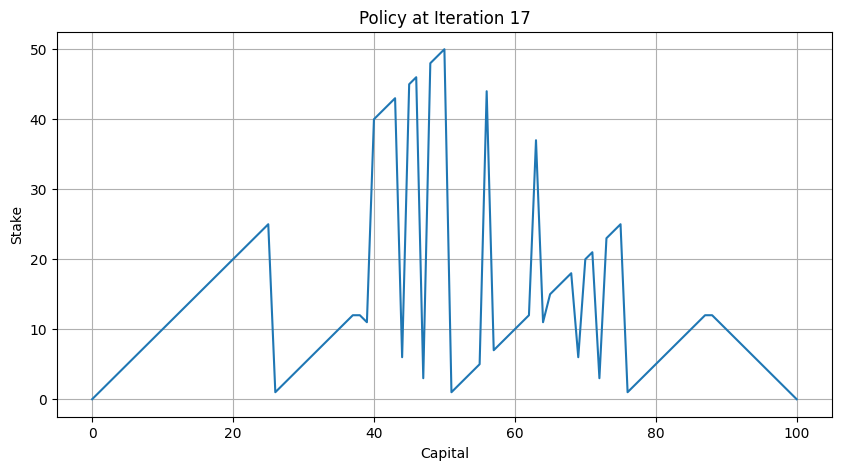

Press Enter to show next iteration...


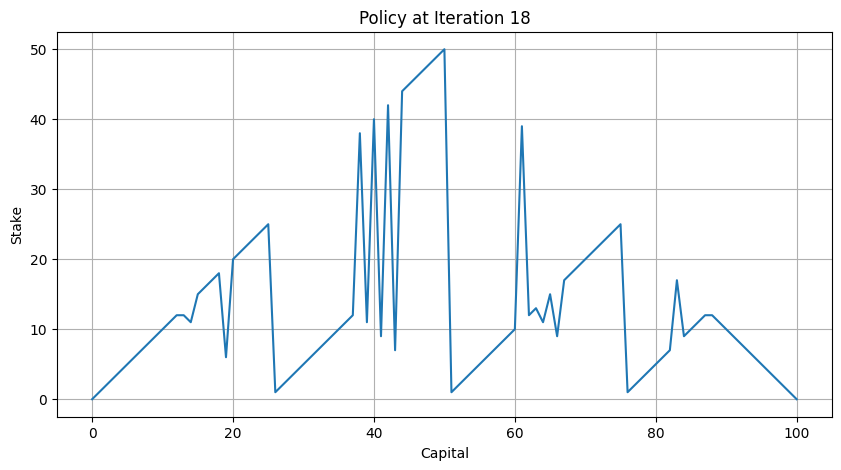

Press Enter to show next iteration...


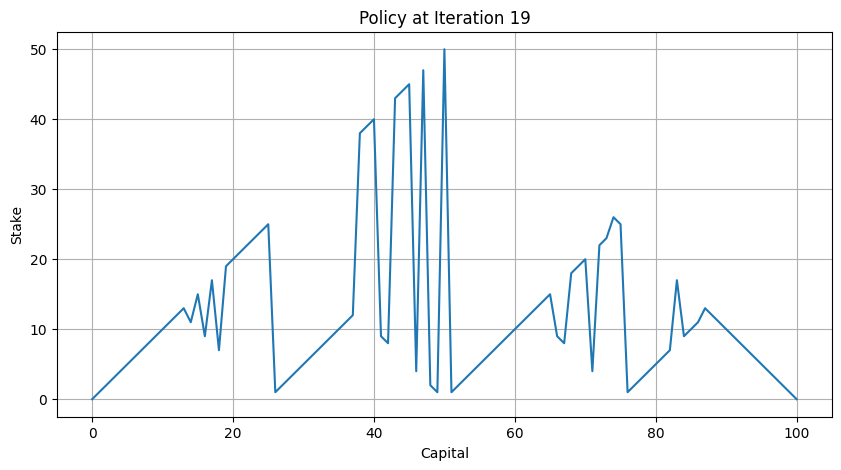

Press Enter to show next iteration...


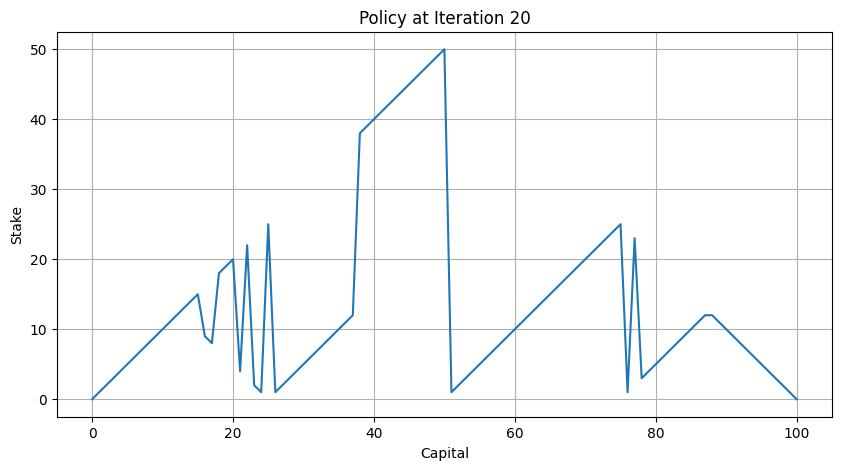

Press Enter to show next iteration...


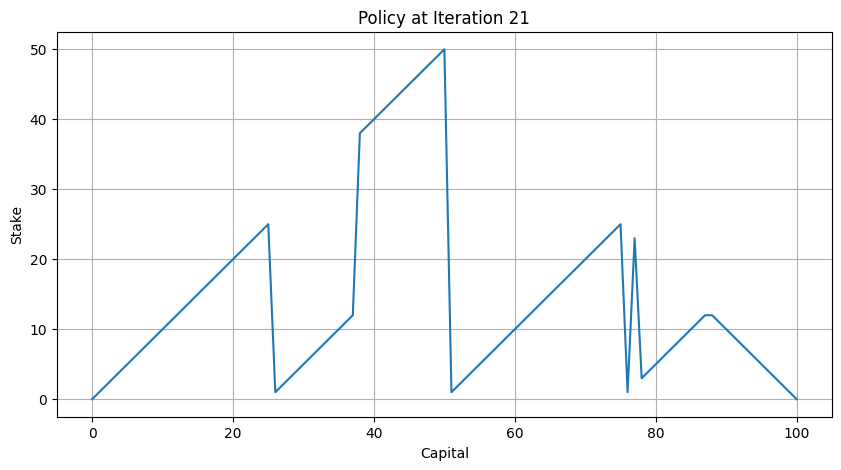

Press Enter to show next iteration...


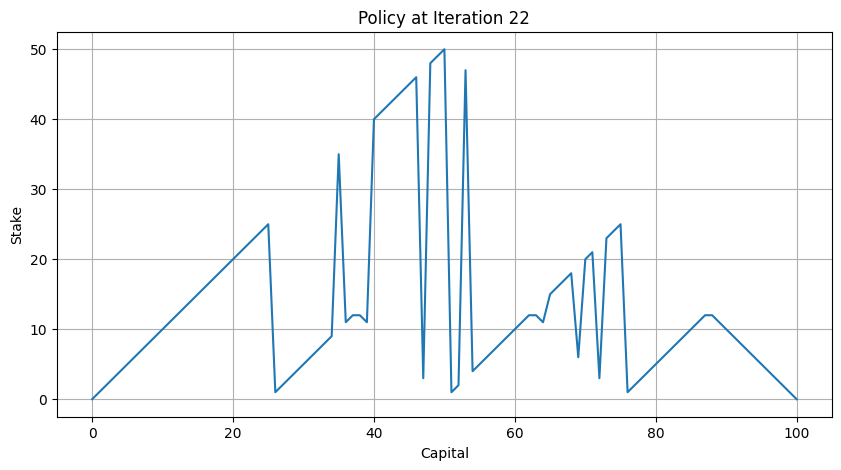

Press Enter to show next iteration...


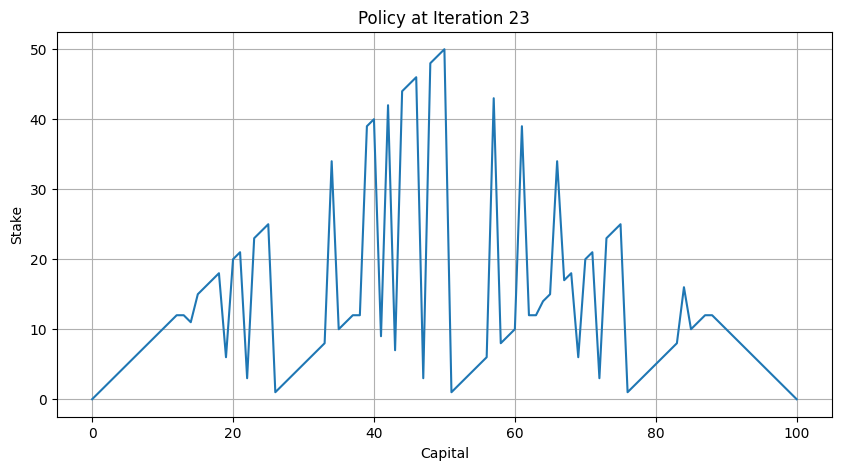

Press Enter to show next iteration...


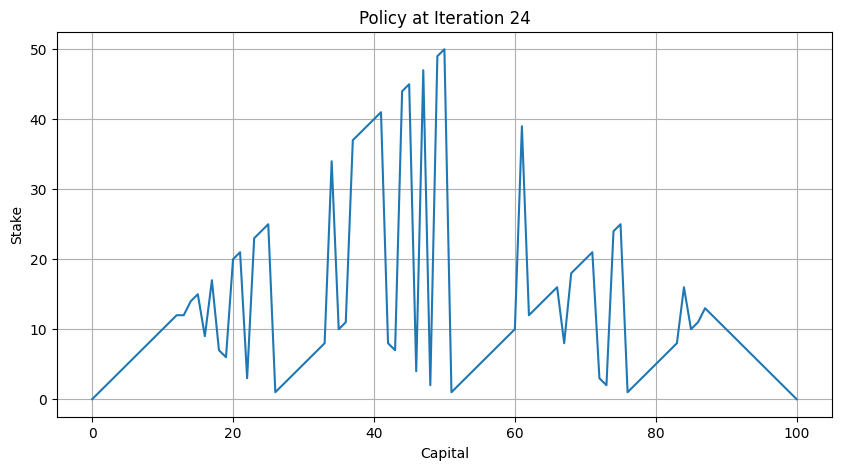

Press Enter to show next iteration...


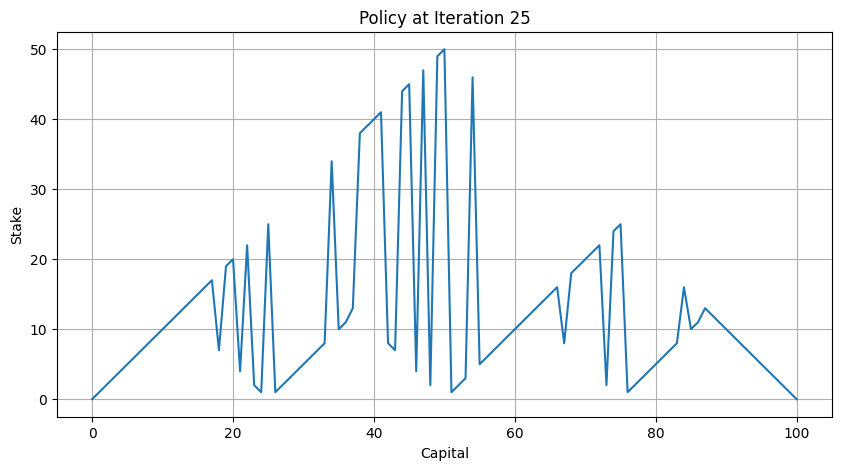

Press Enter to show next iteration...


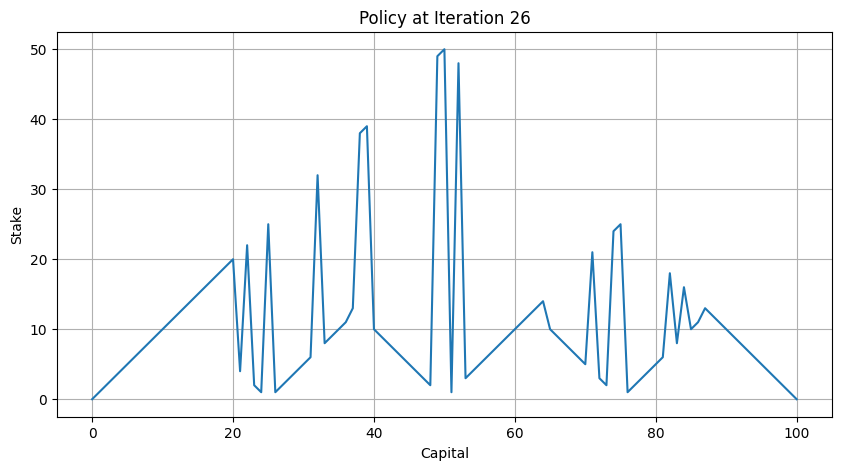

Press Enter to show next iteration...


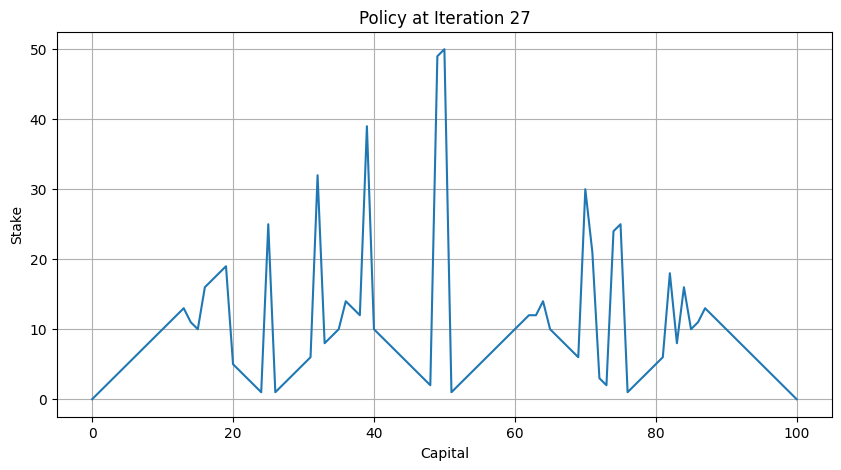

Press Enter to show next iteration...


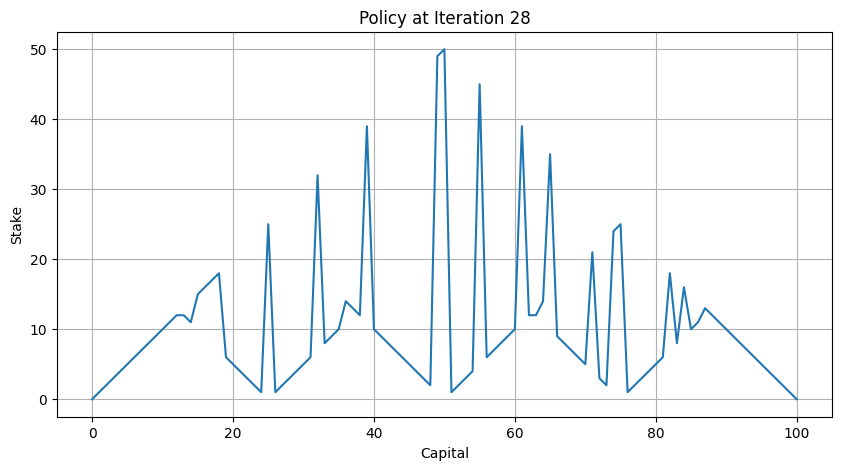

Press Enter to show next iteration...


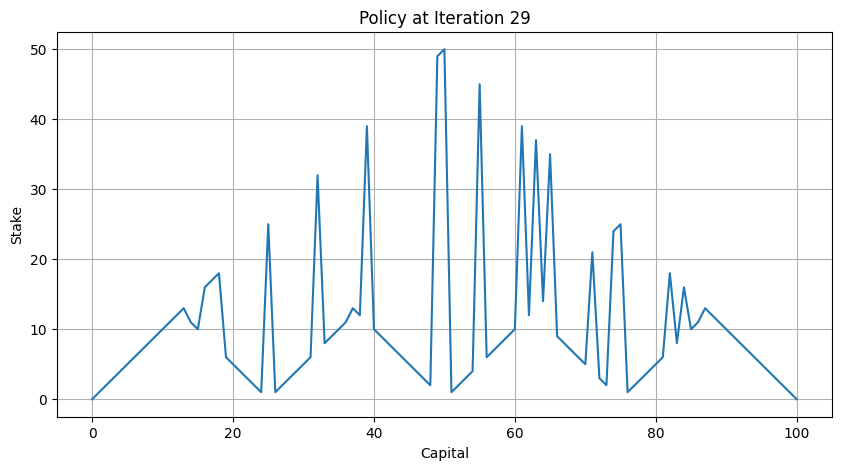

Press Enter to show next iteration...


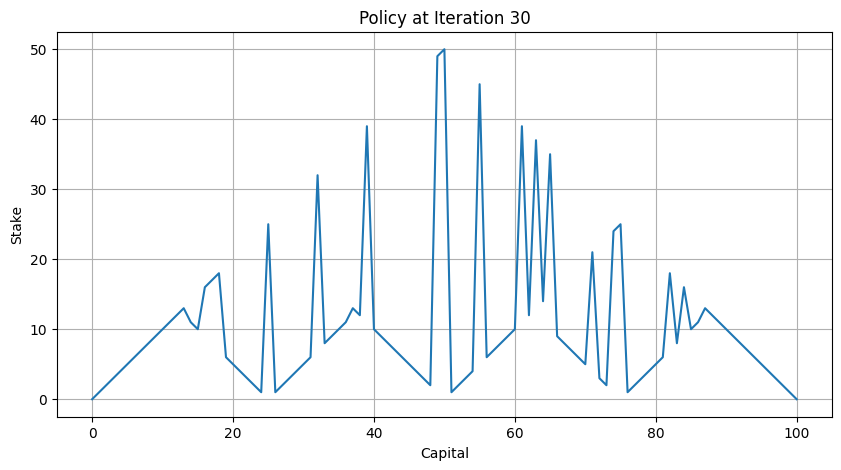

Press Enter to show next iteration...


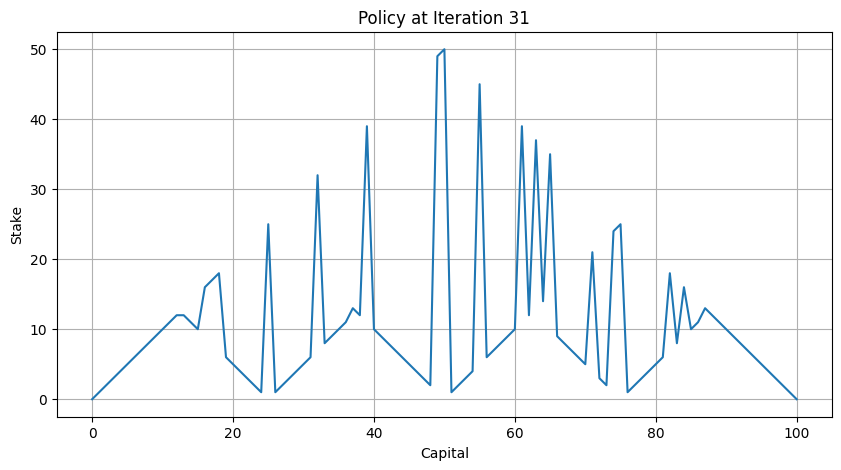

Press Enter to show next iteration...


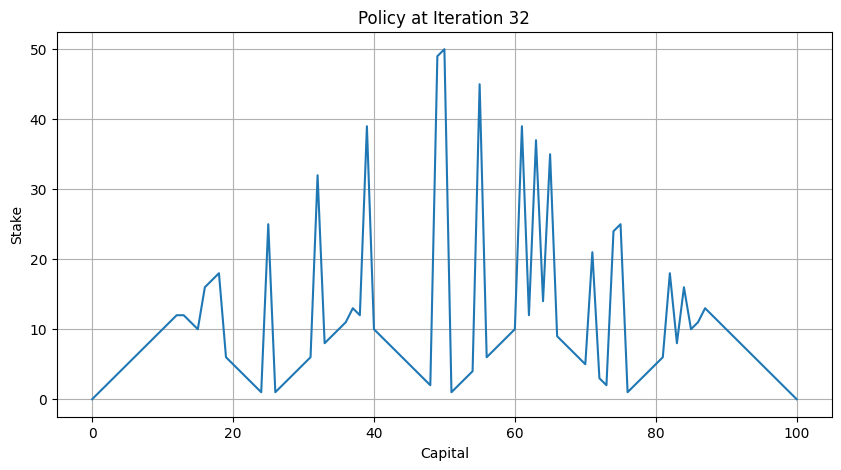

Press Enter to show next iteration...


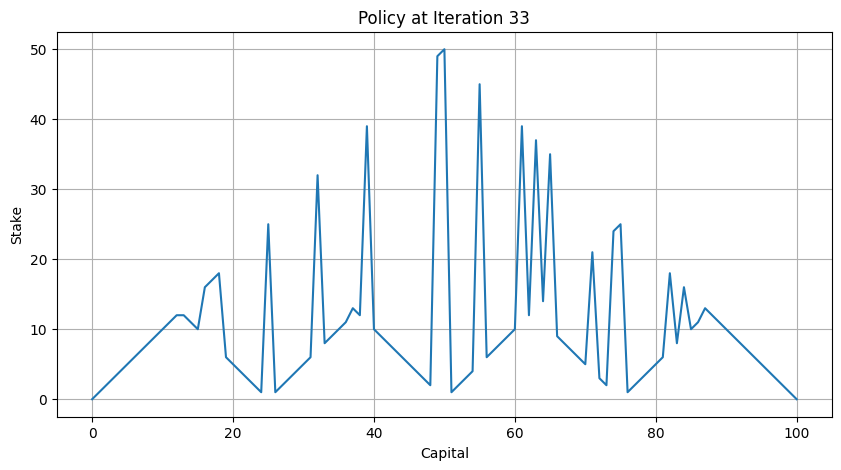

Press Enter to show next iteration...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gambler's Problem parameters
goal = 100
ph = 0.4  # probability of heads
gamma = 1.0

# Initialize state values and policy
V = np.zeros(goal + 1)
V[goal] = 1.0  # Value of goal state is 1
policy = np.zeros(goal + 1)

# Value Iteration parameters
theta = 1e-20
policy_history = []

iteration = 0
while True:
    delta = 0
    for s in range(1, goal):
        action_returns = []
        actions = range(1, min(s, goal - s) + 1)
        for a in actions:
            win_state = s + a
            lose_state = s - a
            reward = 1 if win_state == goal else 0
            expected_return = ph * (reward + gamma * V[win_state]) + (1 - ph) * gamma * V[lose_state]
            action_returns.append(expected_return)
        best_action_value = max(action_returns)
        delta = max(delta, abs(best_action_value - V[s]))
        V[s] = best_action_value

    # Record current policy
    current_policy = np.zeros(goal + 1)
    for s in range(1, goal):
        actions = range(1, min(s, goal - s) + 1)
        action_returns = []
        for a in actions:
            win_state = s + a
            lose_state = s - a
            reward = 1 if win_state == goal else 0
            expected_return = ph * (reward + gamma * V[win_state]) + (1 - ph) * gamma * V[lose_state]
            action_returns.append(expected_return)
        best_action_index = np.argmax(action_returns)
        best_actions = np.argwhere(action_returns == action_returns[best_action_index]).flatten()
        best_action = actions[min(best_actions)]  # Select the smallest bet among the best
        current_policy[s] = best_action

    policy_history.append(current_policy.copy())

    iteration += 1
    if delta < theta:
        break

# Plot all policies per iteration
for i, pol in enumerate(policy_history):
    plt.figure(figsize=(10, 5))
    plt.plot(pol)
    plt.xlabel('Capital')
    plt.ylabel('Stake')
    plt.title(f'Policy at Iteration {i + 1}')
    plt.grid(True)
    plt.show()
    input("Press Enter to show next iteration...")
